# AR I MA: Auto-Regression Integrated Moving-Average

## AR: Auto-Regression is forecasting using Linear combinaiton of past value of the variable
Auto-Regression mean regression against itself. It is run for a set of lagged value, i.e. *p*
It specifies that the output variable depends linearly on its previous value and on a ***Stochastic*** term, i.e. imperfectly predictable

$ y_{t} = c + ϕ_{1} y_{t-1} + ϕ_{2} y_{t-2} + ϕ_{3} y_{t-3} + ..... + ϕ_{p} y_{t-p} + ε_{t} $

Where c is constant, $ϕ_{n} y_{t-n}$ is lagged co-efficient and $ε_{t}$ is white noise

Simplest AR model is AR Model with lag-coefficient 1, i.e. **AR(1)**<br>
$ y_{t} = c + ϕ_{1} y_{t-1} +ε_{t} $

And **AR(2)**<br>
$ y_{t} = c + ϕ_{1} y_{t-1} + ϕ_{2} y_{t-2} +ε_{t} $

And furhter we expand the lag-coefficient, greater would be the accuracy. But too far back will generate noise and thus reduce the accuracy <br>
Statsmodel comes to rescue at this point, i.e. helps to decide how further shall we go and which order is best for us <br>


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tools.eval_measures import mse, rmse, meanabs

import warnings
warnings.filterwarnings("ignore")

# Load the U.S. Population dataset
df = pd.read_csv('../Data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head(); df.tail()

,PopEst
DATE,
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077
2018-11-01,328241
2018-12-01,328393


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2011-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
PopEst    96 non-null int64
dtypes: int64(1)
memory usage: 1.5 KB


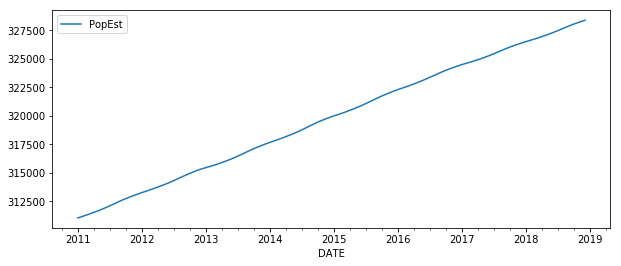

In [3]:
df.plot(figsize=(10,4));


In [4]:
print("Total number of months in the df:",len(df),"i.e.",len(df)//12," years")
print("So, our train data would be ",(len(df)//12)-1,"years, and test data would be 1 year")

Total number of months in the df: 96 i.e. 8  years
So, our train data would be  7 years, and test data would be 1 year


In [5]:
# Set one year for testing
train = df.iloc[:84]; test = df.iloc[84:]

In [34]:
# Loading AR Model
from statsmodels.tsa.ar_model import AR,ARResults

#Training the model
model = AR(train['PopEst'])

## Fit an AR(1) Model

In [35]:
#Fitting the model
AR1fit = model.fit(maxlag=1,method='mle')
#Evaluating model
print(f"AIC:{AR1fit.aic}")
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

AIC:10.52976753420786
Lag: 1
Coefficients:
const        116.976765
L1.PopEst      0.999632
dtype: float64


C:\Users\jaspr\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [39]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR('+str(AR1fit.k_ar)+') Predictions')

mae = meanabs(test['PopEst'], predictions1)
print(f'MAE {AR1fit.k_ar}: {mae}')

MAE 1: 1076.8159290910844


In [37]:
predictions1.head()

2018-01-01    326375.024312
2018-02-01    326372.049718
2018-03-01    326369.076217
2018-04-01    326366.103809
2018-05-01    326363.132494
Freq: MS, Name: AR(1) Predictions, dtype: float64

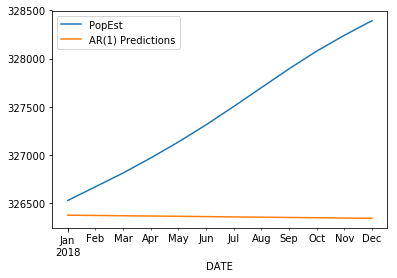

In [38]:
test.plot(legend=True); predictions1.plot(legend=True);

## Fit an AR(2) Model

In [32]:
# Recall that our model was already created above based on the training set
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        125.131589
L1.PopEst      1.996763
L2.PopEst     -0.997156
dtype: float64


C:\Users\jaspr\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [47]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR('+str(AR2fit.k_ar)+') Predictions')

mae = meanabs(test['PopEst'], predictions2)
print(f'MAE {AR2fit.k_ar}: {mae}')

MAE 2: 156.63731494072513


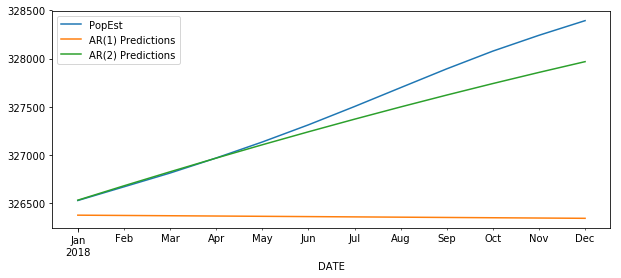

In [13]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(10,4));

### The optimal lag co-efficient is achieved by going beyond and beyond
This can be easily done for us by StatsModel, i.e. providing us ***an optimal p***

In [14]:
ARfit = model.fit(ic="t-stat")

print(f'Lag: {ARfit.k_ar}')

print(f'Coefficients:\n{ARfit.params}')

Lag: 8
Coefficients:
const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


In [75]:
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tools.eval_measures import mse, rmse, meanabs

start = len(train)
end = len(train)+len(test)-1
rename = f'AR('+str(ARfit.k_ar)+') Predictions'

predictions8 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

# Evaluating the model
mse_error = mean_squared_error(test['PopEst'], predictions8)
print(f'RMSE of {ARfit.k_ar}: {np.sqrt(mse_error)}')

mae = meanabs(test['PopEst'], predictions8)
print(f'MAE {ARfit.k_ar}: {mae}')

r2_score_result = r2_score(test['PopEst'], predictions8)
print(f'R2 Square of {ARfit.k_ar}:{r2_score_result}')

RMSE of 12: 2.987782991826897
MAE 12: 2.639252434387648
R2 Square of 12:0.999975577182255


<div class="alert alert-info"><h3>Related Functions:</h3>
<strong>

<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.mse.html'>stattools.eval_measures.mse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.rmse.html'>stattools.eval_measures.rmse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;root mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.meanabs.html'>stattools.eval_measures.meanabs</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;mean absolute error<br>



</div>

The ___Mean Absolute Error___, or MAE, is calculated as the average of the forecast error values, where all of the forecast values are forced to be positive.
    
The ___Mean Squared Error___, or MSE, is calculated as the average of the squared forecast error values. Squaring the forecast error values forces them to be positive; it also has the effect of putting more weight on large errors.

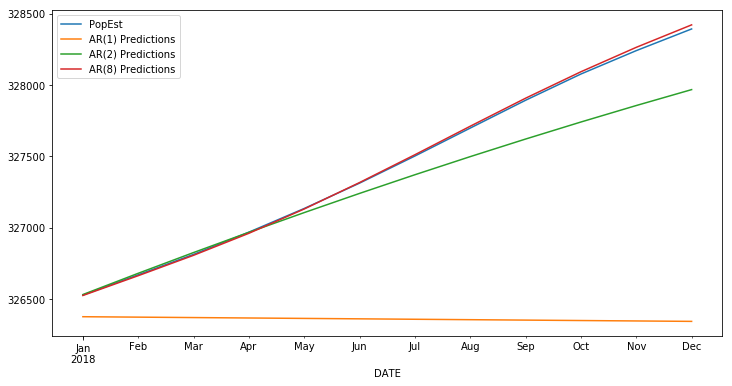

In [16]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));

## Forecasting

In [49]:
#Training on the whole data
model = AR(df['PopEst'])

#Fitting the AR Model
ARfit = model.fit()

forecasted_values = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast('+str(ARfit.k_ar)+')')

#For Forecasted values, Evaluation Metrics are not applicable

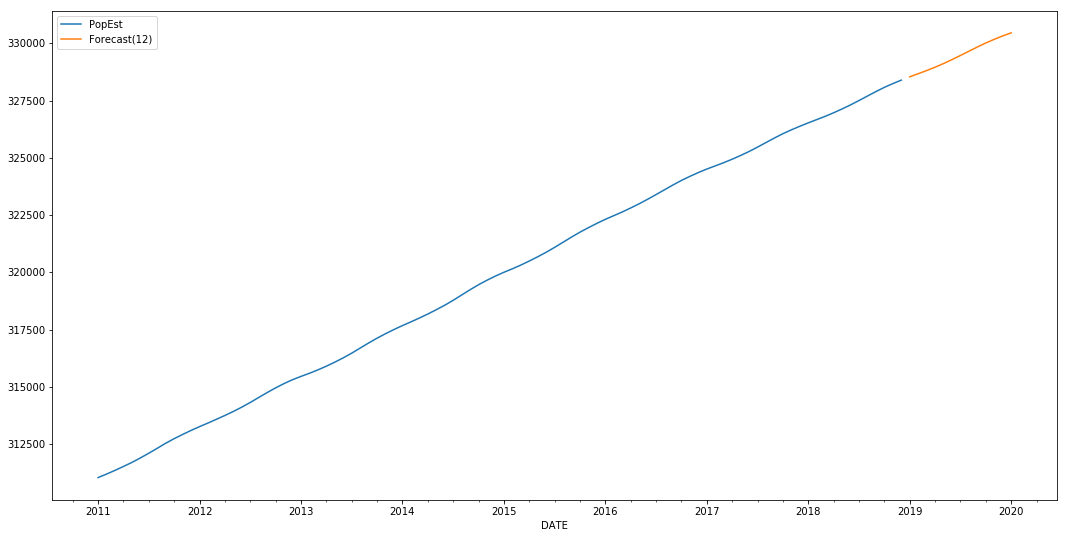

In [51]:
df['PopEst'].plot(figsize=(18,9),legend=True)
forecasted_values.plot(legend=True);

## Test for Stationarity: 
> Augmented Dickey-Fueller Test <br>

## AIC: Akaike Information Criterion
It evaluates a bunch of models, and estimates the quality of each model w.r.t. to other models

## Bayseian Information Criterion
Similar to AIC, only the maths behind is different, i.e. it uses bayseian approach

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccovf.html'>stattools.ccovf</a></strong><font color=black>(x, y[, unbiased, demean])</font>&nbsp;&nbsp;crosscovariance for 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccf.html'>stattools.ccf</a></strong><font color=black>(x, y[, unbiased])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cross-correlation function for 1d<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.periodogram.html'>stattools.periodogram</a></strong><font color=black>(X)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the periodogram for the natural frequency of X<br>
    
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html'>stattools.adfuller</a></strong><font color=black>(x[, maxlag, regression, …])</font>&nbsp;&nbsp;Augmented Dickey-Fuller unit root test<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html'>stattools.kpss</a></strong><font color=black>(x[, regression, lags, store])</font>&nbsp;&nbsp;&nbsp;&nbsp;Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html'>stattools.coint</a></strong><font color=black>(y0, y1[, trend, method, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Test for no-cointegration of a univariate equation<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.bds.html'>stattools.bds</a></strong><font color=black>(x[, max_dim, epsilon, distance])</font>&nbsp;&nbsp;Calculate the BDS test statistic for independence of a time series<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.q_stat.html'>stattools.q_stat</a></strong><font color=black>(x, nobs[, type])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns Ljung-Box Q Statistic<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html'>stattools.grangercausalitytests</a></strong><font color=black>(x, maxlag[, …])</font>&nbsp;Four tests for granger non-causality of 2 timeseries<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.levinson_durbin.html'>stattools.levinson_durbin</a></strong><font color=black>(s[, nlags, isacov])</font>&nbsp;&nbsp;&nbsp;Levinson-Durbin recursion for autoregressive processes<br>

<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.mse.html'>stattools.eval_measures.mse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.rmse.html'>stattools.eval_measures.rmse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;root mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.meanabs.html'>stattools.eval_measures.meanabs</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;mean absolute error<br>
</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Augmented Dickey–Fuller test</font><br>
<strong>
<a href='https://otexts.com/fpp2/accuracy.html'>Forecasting: Principles and Practice:</a></strong>&nbsp;&nbsp;<font color=black>Evaluating forecast accuracy</font>

</div>



In [52]:
import pandas as pd
import numpy as np
%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load a seasonal dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [53]:
from statsmodels.tsa.stattools import ccovf,ccf,periodogram
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse, rmse, meanabs

# Tests for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a [unit root](https://en.wikipedia.org/wiki/Unit_root_test) hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The augmented Dickey-Fuller Test is one such test. 

## Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the [augmented Dickey-Fuller Test](https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test). In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is <em>not</em> stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

help(adfuller)

In [54]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [55]:
dftest = adfuller(df1["Thousands of Passengers"])
dfout = pd.Series(dftest[0:4],index=['ADF Test Statistics','p-value','number of lags','number of observations'])
for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val
dfout

ADF Test Statistics         0.815369
p-value                     0.991880
number of lags             13.000000
number of observations    130.000000
critical value (1%)        -3.481682
critical value (5%)        -2.884042
critical value (10%)       -2.578770
dtype: float64

#  USER DEFINED ***ADF*** FUNCTION (AUGMENTED DICKEY FULLER TEST)

In [56]:
# User defined ADF function

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    series.plot(figsize=(18,9))
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        
        print("Data has a unit root and is non-stationary")

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


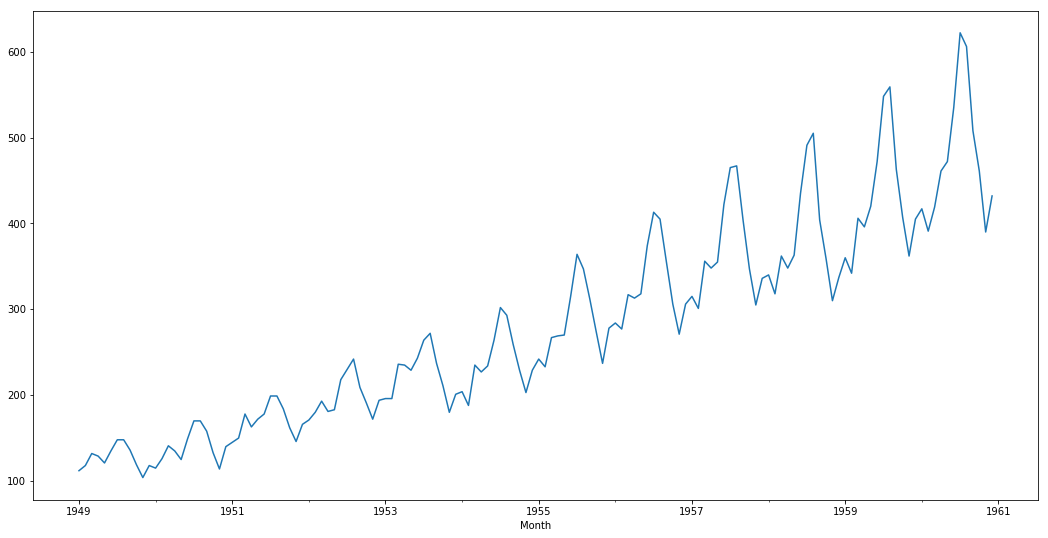

In [57]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


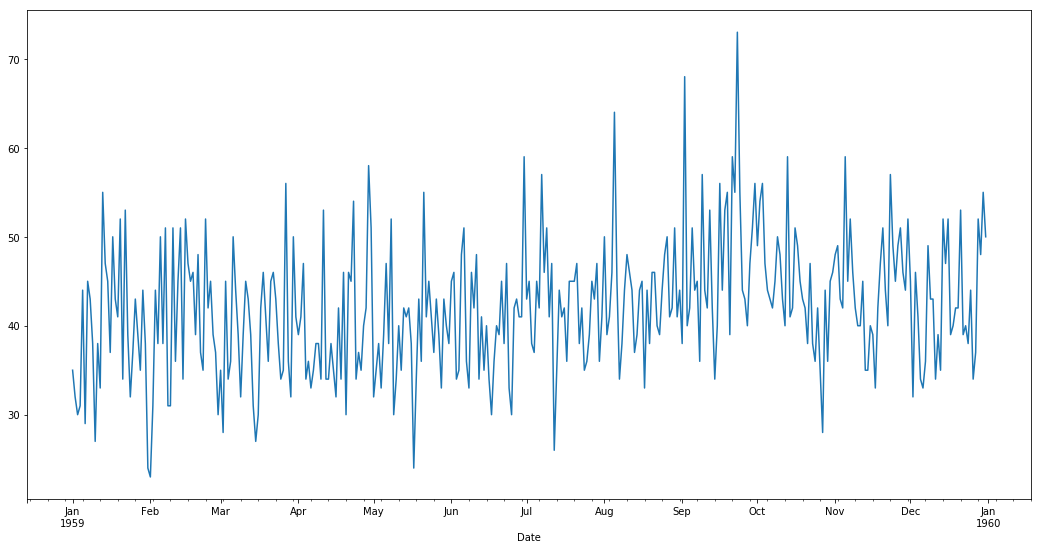

In [58]:
adf_test(df2['Births'])


# GRANGER CASUALITY TEST
The GRANGER CASUALITY TEST is a hypothesis test to determine if one TSD is helpful in forecasting the other TSD.

***Cor-relation ≠ Causation***

> <ins>*Correlation*</ins> is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.
>
> <ins>*Causation*</ins> indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect.

In [59]:
df3=pd.read_csv("../Data/samples.csv",index_col=0, parse_dates=True)
df3.index.freq="MS"
df3.head()

,a,b,c
1950-01-01,36,27,0
1950-02-01,58,22,3
1950-03-01,61,17,5
1950-04-01,37,15,8
1950-05-01,66,13,8


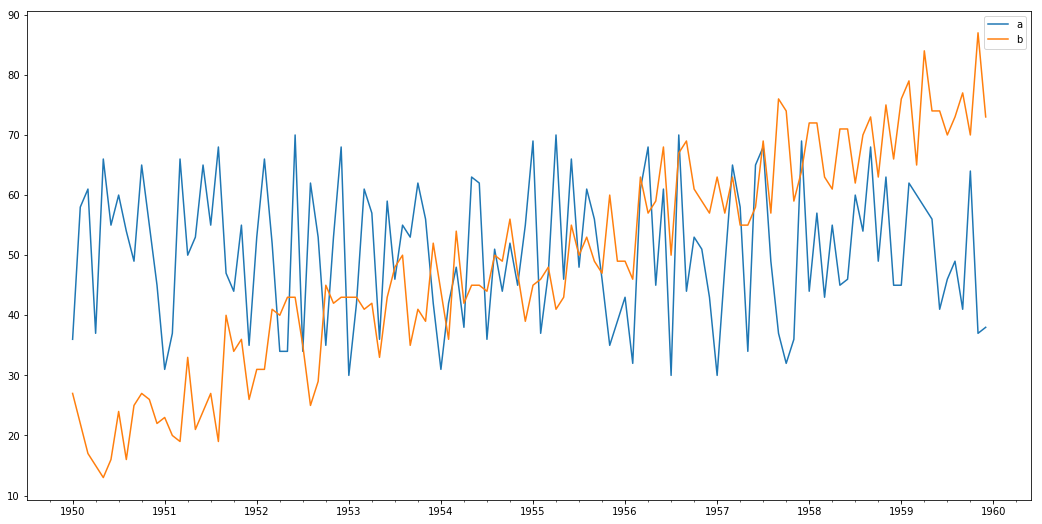

In [60]:
df3[['a','b']].plot(figsize=(18,9))

In [61]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df3[['a','b']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.9140  , p=0.1665  , df=1
likelihood ratio test: chi2=1.8988  , p=0.1682  , df=1
parameter F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=4.1192  , p=0.1275  , df=2
likelihood ratio test: chi2=4.0489  , p=0.1321  , df=2
parameter F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=3.7580  , p=0.2888  , df=3
likelihood ratio test: chi2=3.6989  , p=0.2959  , df=3
parameter F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1769  , p=0.3252  

In [62]:
grangercausalitytests(df3[['a','c']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=0.1325  , p=0.7158  , df=1
likelihood ratio test: chi2=0.1325  , p=0.7159  , df=1
parameter F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=1.6940  , p=0.4287  , df=2
likelihood ratio test: chi2=1.6820  , p=0.4313  , df=2
parameter F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4467  , p=0.7201  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.4255  , p=0.6996  , df=3
likelihood ratio test: chi2=1.4169  , p=0.7016  , df=3
parameter F test:         F=0.4467  , p=0.7201  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6276  , p=0.6438  

In [63]:
np.random.seed(42)

# In the range of 20-30, generate a 50X2 dataframe
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


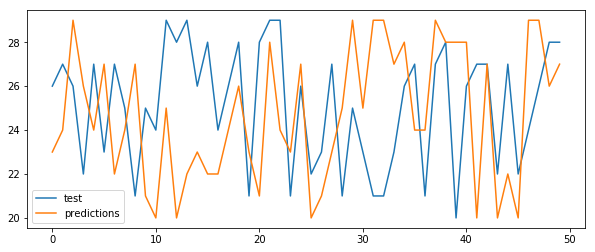

In [64]:
df.plot(figsize=(10,4))

In [65]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [68]:
print(" MSE:",mse(df['test'],df['predictions'])); 
print("RMSE:",rmse(df['test'],df['predictions'])); 

 MSE: 17.02
RMSE: 4.125530268947253


## Monthly and Quaterly Seasonal Component locating

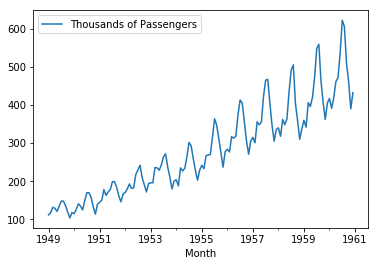

In [70]:
df=pd.read_csv("../Data/airline_passengers.csv", index_col="Month", parse_dates=True)
df.index.freq="MS"
df.plot();

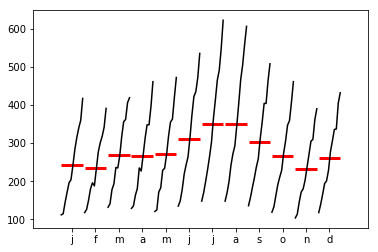

In [71]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

# Note: add a semicolon to prevent two plots being displayed in jupyter
month_plot(df['Thousands of Passengers']);

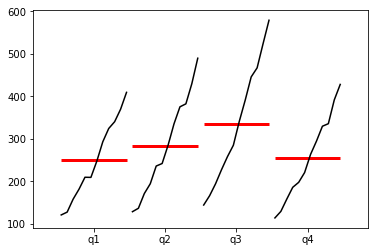

In [73]:
# Since data is a month level, we will have to resample it at Quaterly format
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dfq);

### More on resampling data: [GeeksForGeeks](https://www.geeksforgeeks.org/python-pandas-dataframe-resample/)
>monthly_resampled_data = df.close.resample('M').mean() <br>
>weekly_resampled_data = df.open.resample('W').mean() <br>
>Quarterly_resampled_data = df.open.resample('Q').mean() <br>

# Choosing ARIMA Orders : Auto-Arima
> *p* is the order of the AR model, i.e. number of lags included in the model
<br>
> *d* is the degree of Differencing, i.e. number of time data had its past value subtracted/differenced
<br>
> *q* is the order of the Moving Average, i.e. size of the MA window

The main priority of this step is to pick the order of AR and MA compnonent, and then I order if required. It can be done by two ways:
- **Manually via ACF-PACF plots**: If the AC plots shows +ve Auto-Correlation at the very first lag, then it usggests to us AR terms in relation to lags, MA terms for -ve Auto-Correlation
- **Grid Search**: At times it could be really difficult to read PACF/ACF plots, which probably will add human error, so it is better to perform fird search across p,d,q values to find the most optimal choice

This is done by making use of ***PyramidARIMA*** library, which runs on top of statsmodel's ARIMA. <br>
It searches across various combination of p,d,q and P,D,Q and returns the best combination. This is achieved by minimising ``` Akaike Information Criterion (AIC) ```  value.
> AIC = $2k - 2ln(\hat{L})$ <br>
> Where *k* number of params and *L* is the value of MLE

**ARMA** is defined as
$(1-\sum_{i=1}^p \alpha_{i}L^i)X_{t} = (1+\sum_{i=1}^q \Theta_{i}L^i)\epsilon_{t}$

**ARIMA** is defined as
$(1-\sum_{i=1}^p \Phi ^iL^i) (1-L)^d X_{t} = (1+\sum_{i=1}^q \theta_{i} L^i)\epsilon_{t}$

> *L*=Lag operator

In [76]:
# Load a seasonal dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [79]:
from pmdarima import auto_arima

step_wise_fit = auto_arima(df2['Births'], start_p=0,start_q=0, seasonal=False, trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.102 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.189 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.293 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.515, BIC=2480.001, Fit time=1.160 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.885, BIC=2485.268, Fit time=2.179 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.731 seconds
Total fit time: 4.725 seconds


In [81]:
#  Choosing the best combinaiton:
step_wise_fit.summary() # Smallest AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Tue, 07 Jul 2020   AIC                           2460.154
Time:                        12:20:07   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [84]:
# m is time-period for seasonal differencing, 
# i.e. m=1 for annual data, m=4 for quaterly data, m=7 for daily data,  m=12 for monthly data, m=52 for weekly data
step_wise_fit2 = auto_arima(df1['Thousands of Passengers'], start_p=0,start_q=0, seasonal=True, m=12, trace=True) 

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.445 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1398.827, BIC=1407.716, Fit time=0.235 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1301.228, BIC=1316.042, Fit time=0.681 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1304.383, BIC=1313.271, Fit

In [85]:
step_wise_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -626.801
Date:                            Tue, 07 Jul 2020   AIC                           1267.601
Time:                                    12:24:48   BIC                           1288.341
Sample:                                         0   HQIC                          1276.029
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.168      4.169      0.000       0.372       1.033
ar.L1          1.4368      0.109     13.169      0.000       1.223       1.651
ar.L2         -0.7066      0.080     -8.815      0.000      -0.864      -0.549
ma.L1         -1.4832      0.174     -8.524      0.000      -1.824      -1.142
ma.L2          0.5033      0.175      2.877      0.004       0.160       0.846
ma.S.L12       0.7444      0.077      9.730      0.000       0.594       0.894
sigma2       345.6775     37.222      9.287      0.000     272.723     418.631
===================================================================================
Ljung-Box (Q):                      164.01   Jarque-Bera (JB):                10.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""